In [15]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from model import VideoObjectSegmentationModel
from dataset import Dataset

In [16]:
env = "MsPacmanNoFrameskip-v4"
batch_size = 64
H = W = 84
num_frames = 2
model_path = f"wandb/run-20220617_174100-zd56kkp4/files/{env}.pt"

model = VideoObjectSegmentationModel()
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval();

In [23]:
dataset = Dataset(env, 16, num_frames, H, W)
inp = dataset.get_batch("val")
flow_out, of = model(inp)
flow_out = torch.reshape(flow_out, (-1, flow_out.size(2), flow_out.size(3), flow_out.size(1)))
x0 = torch.unsqueeze(inp[:, 0, :, :], 1)
x0_ = F.grid_sample(x0, flow_out, align_corners=False)
x1 = torch.unsqueeze(inp[:, 1, :, :], 1)
loss = model.compute_loss(x0_, x1, of)
print("loss:", loss)

loss: tensor(0.1207, grad_fn=<AddBackward0>)


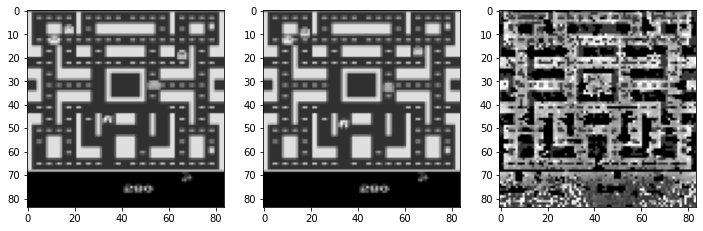

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
idx = 14
ax[0].imshow(x0[idx].permute([1, 2, 0]).detach().numpy(), cmap='gray')
ax[1].imshow(x1[idx].permute([1, 2, 0]).detach().numpy(), cmap='gray')
ax[2].imshow(x0_[idx].permute([1, 2, 0]).detach().numpy(), cmap='gray')